# Studying Damped Oscillations

This problem consists of studying damped oscillations. Remember that the 2nd-order ODE describing damped oscillations is:

$$m\,\frac{d^2y}{dt^2}+b\,\frac{dy}{dt}+k\,y = 0$$

where $m=1\,\rm kg$ is the oscillator mass, $b$ is the damping coefficient, and $k$ is the force constant of the oscillator. The analytical solution to the above ODE, known as the damped oscillation equation, reads:

$$\boxed{y(t)=A\,e^{-\beta\,t}\,\cos{(\omega\,t)}}$$ 

where $A$ is the initial oscillation amplitude, $\beta=b/2m$ is the damping ratio, and $\omega$ is the angular frequency of the oscillations given by:

$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}}.$$  

## Data File

The data file given below contains a time series obtained from a damped harmonic oscillator experiment. The first column of the file has times in seconds $\rm [s]$ and the second column has the displacements in meters $\rm [m]$. It can be found at:

[GitHub: damped_pendulum.csv](https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/damped_pendulum.csv)

### Data Reference:

[Kaggle: Damped Harmonic Oscillator](https://www.kaggle.com/datasets/cici118/damped-harmonic-oscillator)

## Activities to do
* a) Create a python I/O function that opens the data file and returns $\textbf{2}$ arrays, one for times and one for displacements.

* b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

* c) Use a physically-motivated model (i.e. the damped oscillation equation), and constrain its free parameters by carrying out a regression.

* d) Report the results from your regression, i.e. the best-fit values for the free parameters with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

  * The initial amplitude, $A$, of the oscillations.
  * The damping ratio, $\beta$.
  * The angular frequency, $\omega$, of the damped pendulum.
  * The damping coefficient, $b$.
  * The force constant of the oscillator, $k$.

* e) Make a plot showing the empirical data and the best-fit model obtained from your regression.



### a) Create a python I/O function that opens the data file and returns $\textbf{2}$ arrays, one for times and one for displacements.

In [1]:
#Import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def readpendulum(filename):
    '''
    This function reads the data taken of position and time from a damped pendulum.
    Input: filename (string)
    Output: time (array), position (array)
    Algorithm:
        Read the file using Pandas and convert it to a DataFrame
        Extract the columns using the Titles as indeces
        Convert each row to an array
        Return time, position
    Author: AlejoS
    Date modified: 08/03/2025
    '''
    file = pd.read_csv(filename, sep=',') #we have cat the file before and check it is csv
    
    time = np.array(file["time"])
    position = np.array(file["displacement"])

    return time, position
    

### b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

In [3]:
#Import file
file_1 = "/home/prostofsound/jnotebooks/computational-physics-1/Notes/data/damped_pendulum.csv"
t_1, p_1 = readpendulum(file_1)
#Safe check
#print(t_1)
#print(p_1)


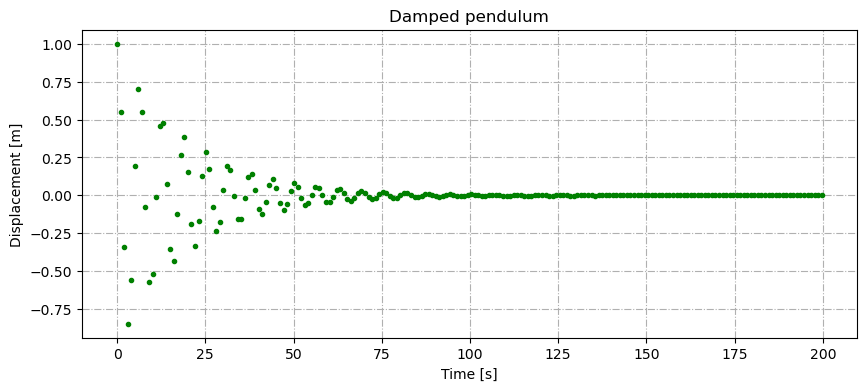

In [4]:
#Plotting
# Open env and stablish the figure size
plt.figure(figsize=(10,4))

plt.plot(t_1, p_1, color = "green", linestyle = " ", marker = ".") #add marker and remove linestyle

# Title with latex syntax
plt.title("Damped pendulum")

# Axes titles
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")

# Show/Save
plt.grid(linestyle = '-.') #nice grid style
plt.show()
plt.close()

### c) Use a physically-motivated model (i.e. the damped oscillation equation), and constrain its free parameters by carrying out a regression.

In [5]:
def model_dp(t, A, beta, omega):
    """
    This function returns the position of the damped pendulum, given the parammeters: beta(b/2m, beta is the damping coeffcient),
    omega (angular frequency), A (amplitude), t (time, we have to discretize the time, i.e, create an array)

    t is not a parammeter
    """
    y = A*np.exp(-beta*t)*np.cos(omega*t)
    
    return y

We're going to carry out the regression using scipy optimize library.

In [6]:
#Import library
import scipy.optimize as opt

In [7]:
coef_1, cov_1 = opt.curve_fit(model_dp, t_1, p_1)
#print(coef_1)
#print(cov_1)
print(coef_1.shape)
print(cov_1.shape)

(3,)
(3, 3)


In [8]:
#Evaluate the best fit parammeters into our model.
fit_dpendulum = model_dp(t_1, *coef_1)

###  d) Report the results from your regression, i.e. the best-fit values for the free parameters with their respective uncertainties.

To get the uncertainty associated with each free parameter we have to diagonalize the covariance matrix.

In [9]:
uncertainties_1 = np.sqrt(np.diag(cov_1))
print(uncertainties_1)

[0.00321046 0.00023848 0.00017709]


In [10]:
print('A = %.6g +/- %.6g \nbeta = %.6g  +/- %.6g \nomega = %.6g  +/- %.6g ' % (coef_1[0], uncertainties_1[0],\
                                                                          coef_1[1], uncertainties_1[1],\
                                                                          coef_1[2], uncertainties_1[2]))

A = 1.00313 +/- 0.00321046 
beta = 0.0501239  +/- 0.000238481 
omega = 0.996238  +/- 0.000177095 


This reporting can be better done by using a function.

In [11]:
# Function
def reporting(coef, cova, coef_name):
    """
    """
    # Uncertainties
    uncertainties = np.sqrt(np.diag(cova))

    # Run this loop
    for i in range(len(coef)):
        print(f'{coef_name[i]:.6} = {coef[i]:.6} +/- {uncertainties[i]:.6}')

    return uncertainties

In [12]:
# Define the names
coef_names = ['A', 'beta', 'omega']

# Call the function
uncertainties_array = reporting(coef_1, cov_1, coef_names)

A = 1.00313 +/- 0.00321046
beta = 0.0501239 +/- 0.000238481
omega = 0.996238 +/- 0.000177095


Now, we find the damping coefficient, b.

In [13]:
#beta = b/2m, m = 1 kg
beta = coef_1[1]
b = beta*2

#To get the uncertainty of b, we also consider the uncertainty of beta
b_uncertainty = uncertainties_1[1]*2

print(f'b = {b:.6g} +/- {b_uncertainty:.6g}')

b = 0.100248 +/- 0.000476962


Now, to find k, we have to consider the respective uncertainties of both omega and b.

$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}} \Rightarrow k = m (\omega² + \frac{b^2}{4m²})$$

Also, to find its respective uncertainty we use propagation of errors.
$$\sigma_k = \sqrt{\left( \frac{\partial f}{\partial \omega} \sigma_\omega \right)^2 + \left( \frac{\partial f}{\partial b} \sigma_b \right)^2}
$$

where $k = f(\omega, b)$

Then,

$$\sigma_k = \sqrt{(2 m \omega \sigma_\omega)^2 + (\frac{b}{2 m}\sigma_b)²}$$

$$\sigma_k = 2 m\sqrt{\omega² \sigma_\omega^2 + \frac{b²}{16 m⁴}\sigma_b²}$$

In [14]:
omega = coef_1[2]
k = omega**2 + b**2/4

k_uncertainty = 2*np.sqrt((omega**2)*(uncertainties_1[2])**2 + (b**2)*(b_uncertainty)**2/16)

print(f'k = {k:.6g} +/- {k_uncertainty:.6g}')

k = 0.995002 +/- 0.000353666


### e) Make a plot showing the empirical data and the best-fit model obtained from your regression.

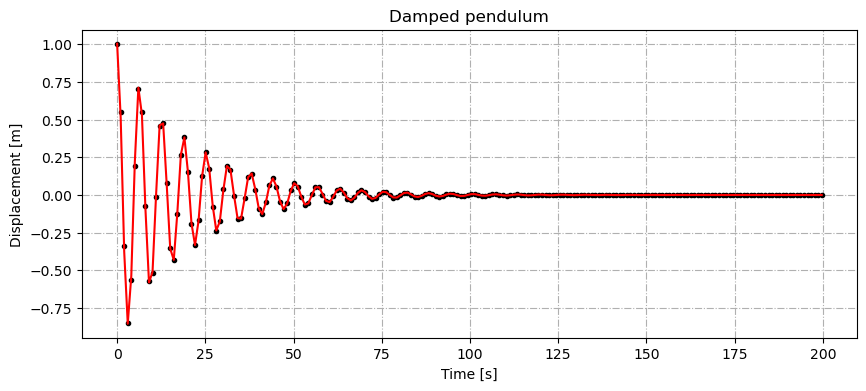

In [15]:
#Plotting
# Open env and stablish the figure size
plt.figure(figsize=(10,4))

plt.plot(t_1, p_1, color = "k", linestyle = " ", marker = ".") #data points
plt.plot(t_1, fit_dpendulum, color = "red", linestyle = "-") #best-fit model

# Title with latex syntax
plt.title("Damped pendulum")

# Axes titles
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")

# Show/Save
plt.grid(linestyle = '-.') #nice grid style
plt.show()
plt.close()

In [16]:
#We can improve the resolution by adding more time steps
new_time = np.linspace(t_1[0], t_1[-1], 2000)

#Call the fit model again
new_fit_model = model_dp(new_time, *coef_1)

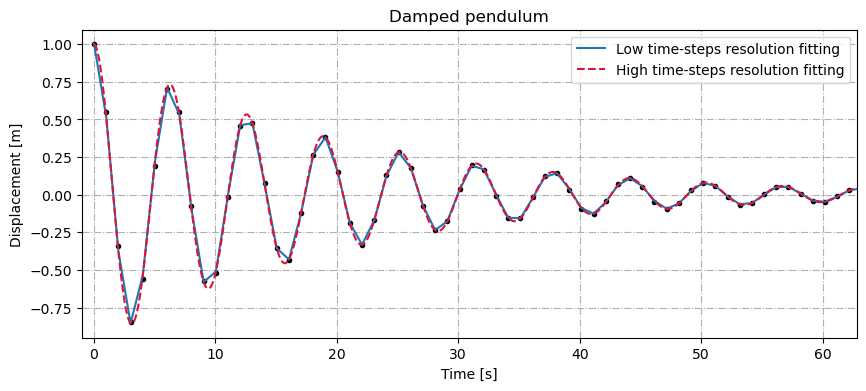

In [21]:
#Plotting
# Open env and stablish the figure size
plt.figure(figsize=(10,4))

plt.plot(t_1, p_1, color = "k", linestyle = " ", marker = ".") #data points
plt.plot(t_1, fit_dpendulum, color = "C10", linestyle = "-", label = "Low time-steps resolution fitting") #best-fit model
plt.plot(new_time, new_fit_model, color = "crimson", linestyle = "--", label = "High time-steps resolution fitting") #new best-fit model

# Title with latex syntax
plt.title("Damped pendulum")

# Axes titles
plt.xlim(-1,20*np.pi)
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")
plt.legend()

# Show/Save
plt.grid(linestyle = '-.') #nice grid style
plt.show()
plt.close()